### Student Information
Name:蔡明偉

Student ID:114062424

GitHub ID:william-code87

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
# import library
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt

In [2]:
# initialize
categories = ['Neutral', 'Positive', 'Negative']
data = pd.read_csv("newdataset\Reddit-stock-sentiment.csv")
data.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [3]:
data.shape

(847, 16)

In [4]:
data['label'] = data['label'].astype(int) # convert label to int
data['label_name'] = data['label'].apply(lambda x: categories[x])
data = data[['text', 'subreddit', 'label', 'label_name']]
data.head()

,text,subreddit,label,label_name
0,Calls on retards,wallstreetbets,-1,Negative
1,Stunt as in like why did they even make a big ...,wallstreetbets,0,Neutral
2,Seeing lots of red in the ticker.,StockMarket,0,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,stockstobuytoday,1,Positive
4,He didn’t say thank you.,StockMarket,-1,Negative


In [5]:
# handling missing data
missing_mask = data.applymap(lambda x: pd.isna(x) or str(x).strip() == '') # check for NaN and empty value
missing_counts = missing_mask.sum()

print(missing_counts)

data.dropna(inplace=True)


text          0
subreddit     0
label         0
label_name    0
dtype: int64


C:\Users\WILLIAM\AppData\Local\Temp\ipykernel_56900\3930139603.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  missing_mask = data.applymap(lambda x: pd.isna(x) or str(x).strip() == '') # check for NaN and empty value


In [6]:
# handling duplicate data
print(f"Sum duplicates data: {sum(data.duplicated())}")

data.drop_duplicates(keep=False, inplace=True)

print(f"Sum duplicates data after deletion: {sum(data.duplicated())}")
print(f"Data shape:{data.shape}")

Sum duplicates data: 23
Sum duplicates data after deletion: 0
Data shape:(813, 4)


In [7]:
# data sampling
data_sample = data.sample(n=400)
print(len(data_sample))
print(data_sample.head())

400
                                                  text         subreddit  \
479                        Thank God this week is over    wallstreetbets   
334       What site can you even purchase this stock ?  stockstobuytoday   
169  Just stumbled upon some exciting news about St...  stockstobuytoday   
766  As a European it feels like America as a norma...       StockMarket   
47   Weekend thread is where the real ones at ![img...    wallstreetbets   

     label label_name  
479      1   Positive  
334      0    Neutral  
169      1   Positive  
766     -1   Negative  
47       0    Neutral  


label_name
Neutral     391
Negative    315
Positive    107
Name: count, dtype: int64
label_name
Neutral     195
Negative    151
Positive     54
Name: count, dtype: int64


<Axes: title={'center': 'Category Distribution'}, xlabel='label_name'>

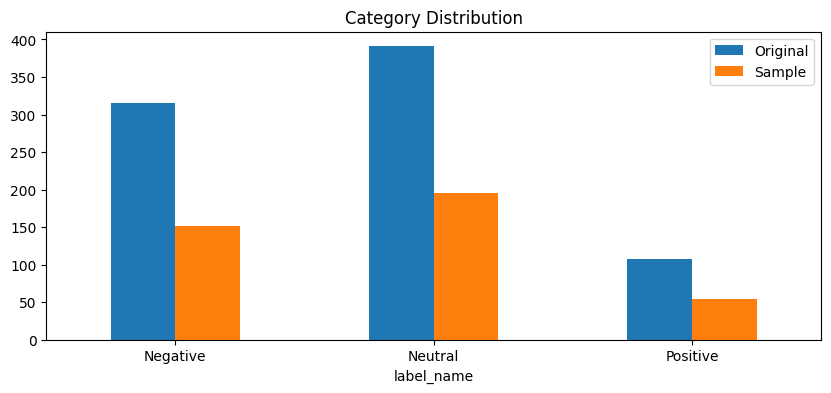

In [8]:
# Visualize original data and sample data
print(data.label_name.value_counts())
print(data_sample.label_name.value_counts())

orig_counts = data['label_name'].value_counts().sort_index()
sample_counts = data_sample['label_name'].value_counts().sort_index()

comparison_df = pd.DataFrame({
    'Original': orig_counts,
    'Sample': sample_counts
})

comparison_df.plot(kind='bar',
                   figsize=(10,4),
                   title='Category Distribution',
                   rot=0)

In [9]:
# feature creation
import nltk
import helpers.data_mining_helpers as dmh
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WILLIAM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\WILLIAM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [10]:
data['unigrams'] = data['text'].apply(lambda x: dmh.tokenize_text(x))
print(data[0:4]["unigrams"])

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object


In [11]:
# Feature subset selection
count_vect = CountVectorizer(stop_words="english")
data_counts = count_vect.fit_transform(data.text) 
print(data_counts[0])

  (np.int32(0), np.int32(643))	1
  (np.int32(0), np.int32(3059))	1


In [12]:
print(count_vect.get_feature_names_out()[800])
print(data_counts.shape)

colapse
(813, 4072)


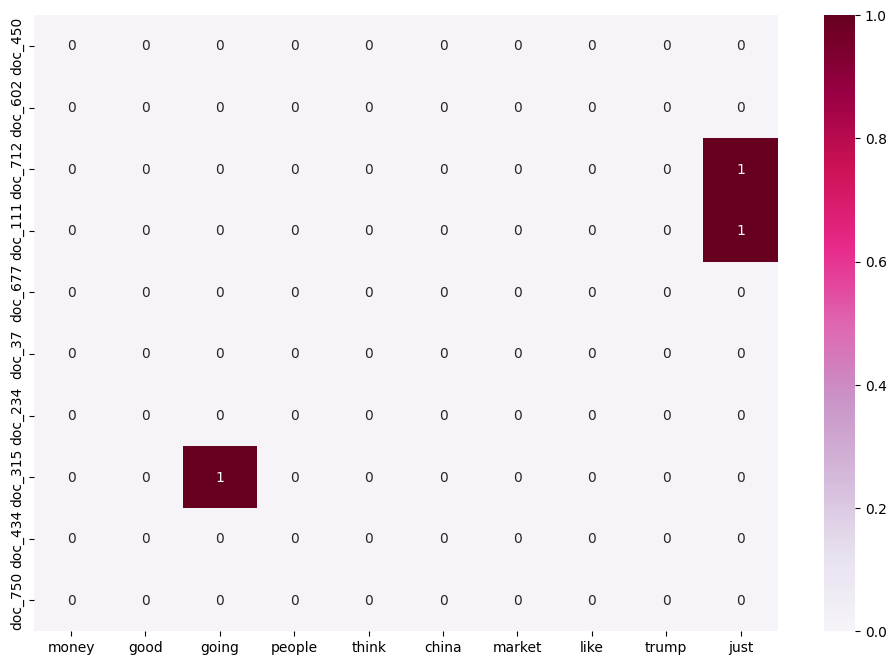

In [13]:
# Heatmap of the 10 most frequent terms and random text
import seaborn as sns

top_n = 10
doc_idx = np.random.choice(data_counts.shape[0], size=10, replace=False)
term_frequencies = np.asarray(data_counts.sum(axis=0)).flatten()
top_terms_idx = term_frequencies.argsort()[-top_n:]
plot_z = data_counts[doc_idx, :][:, top_terms_idx].toarray()
plot_x = count_vect.get_feature_names_out()[top_terms_idx]
plot_y = ["doc_" + str(i) for i in doc_idx]

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.figure(figsize=(12, 8))
sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)
plt.show()

In [14]:
term_frequencies = []
for j in range(0,data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))

term_frequencies = np.asarray(data_counts.sum(axis=0))[0]

print(term_frequencies[0])

4


C:\Users\WILLIAM\AppData\Local\Temp\ipykernel_56900\3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


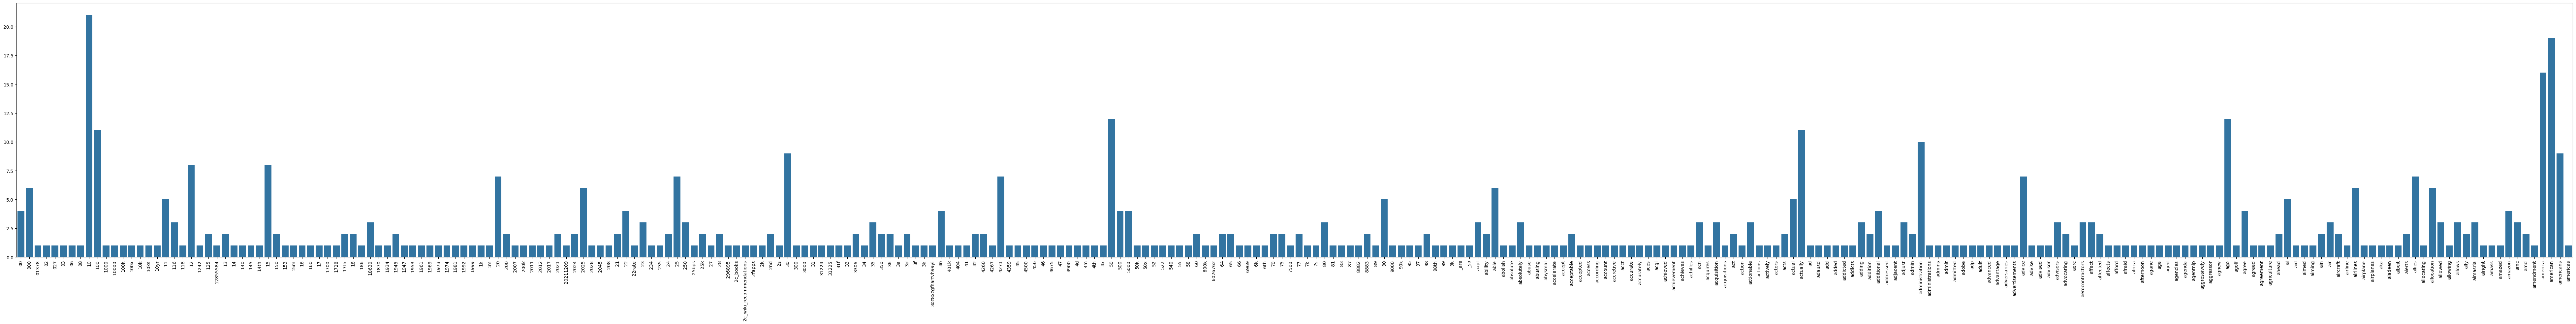

In [15]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

C:\Users\WILLIAM\AppData\Local\Temp\ipykernel_56900\2205743283.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms, y=top_freqs, palette="Purples_r")


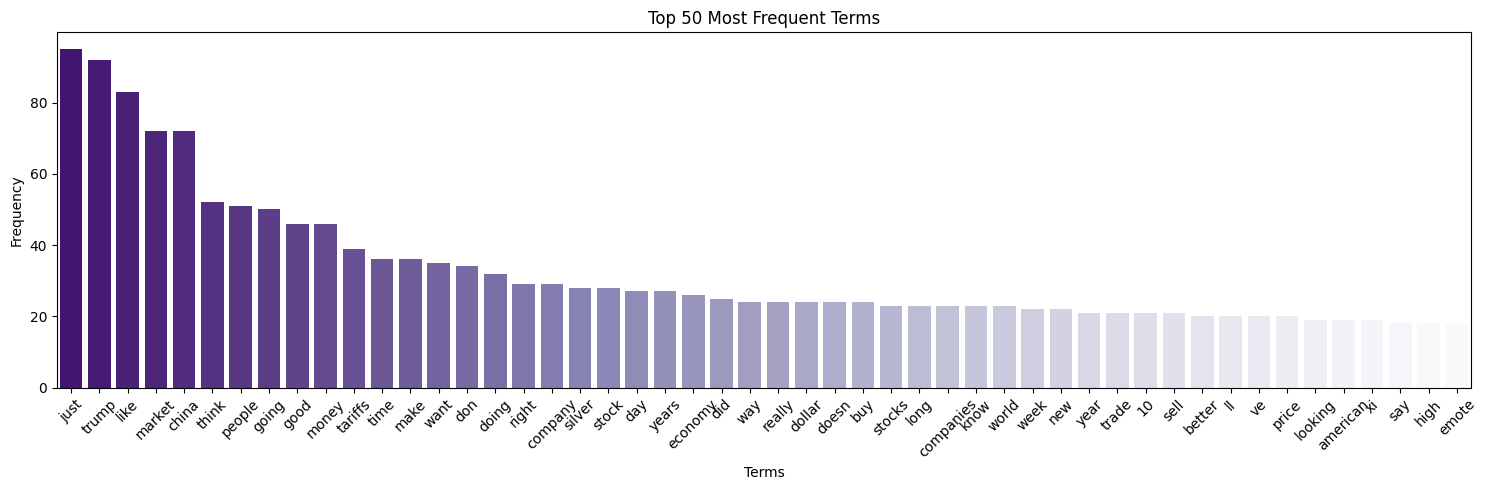

In [16]:
term_frequencies = np.asarray(data_counts.sum(axis=0)).flatten()

# take the 50 most frequent terms
top_n = 50
top_terms_idx = term_frequencies.argsort()[-top_n:][::-1]  # take top-N index
top_terms = count_vect.get_feature_names_out()[top_terms_idx]
top_freqs = term_frequencies[top_terms_idx]

plt.figure(figsize=(15,5))
sns.barplot(x=top_terms, y=top_freqs, palette="Purples_r")
plt.xticks(rotation=45)
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.title(f"Top {top_n} Most Frequent Terms")
plt.tight_layout()
plt.show()

C:\Users\WILLIAM\AppData\Local\Temp\ipykernel_56900\3655612951.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


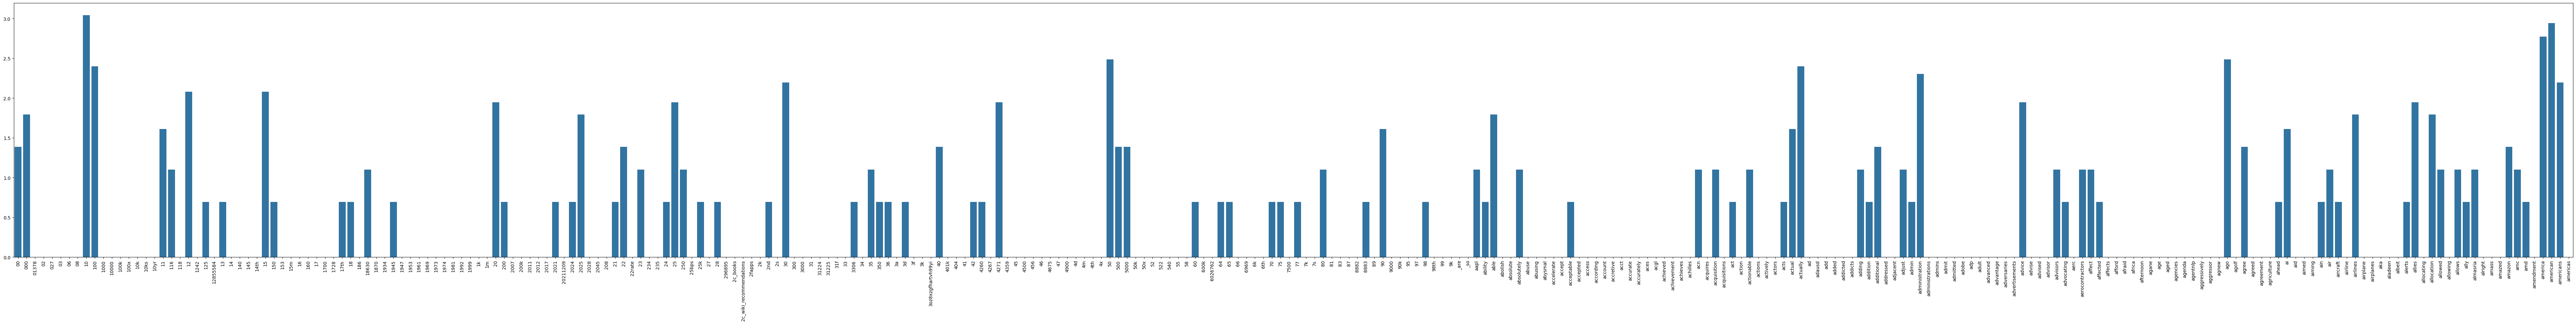

In [17]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

C:\Users\WILLIAM\AppData\Local\Temp\ipykernel_56900\2614657689.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms_sorted, y=top_freqs_log_sorted, palette="Purples_r")


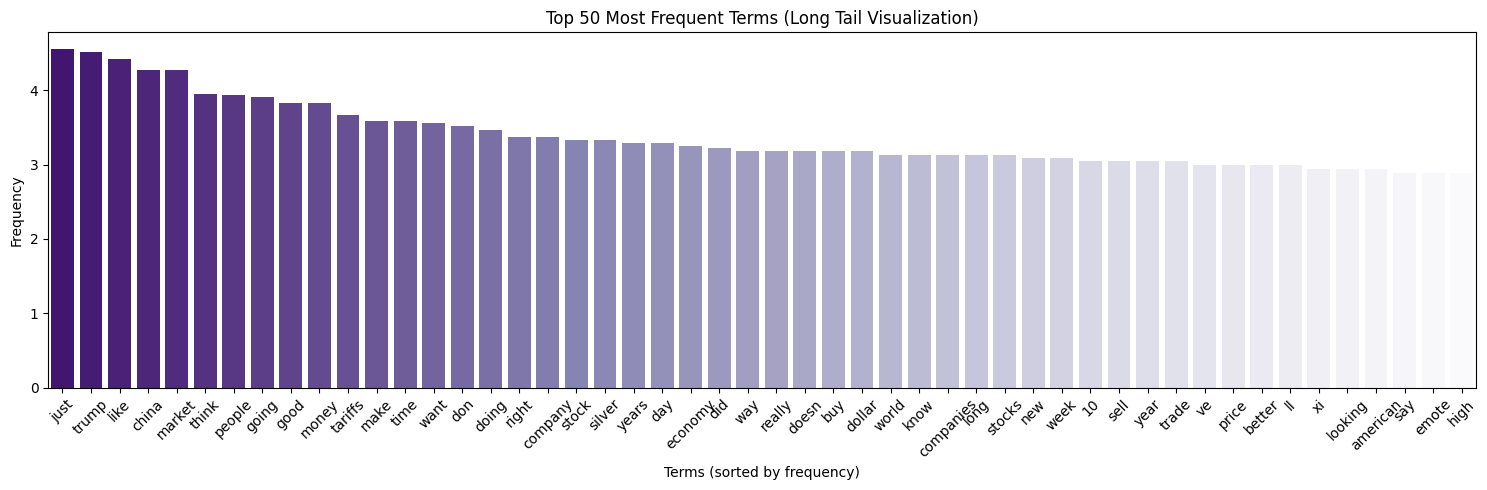

In [18]:
top_freqs_log = np.asarray(term_frequencies_log)[top_terms_idx]

# Sort frequency
sorted_idx = np.argsort(top_freqs_log)[::-1]
top_terms_sorted = top_terms[sorted_idx]
top_freqs_log_sorted = top_freqs_log[sorted_idx]

plt.figure(figsize=(15,5))
sns.barplot(x=top_terms_sorted, y=top_freqs_log_sorted, palette="Purples_r")
plt.xticks(rotation=45)
plt.xlabel("Terms (sorted by frequency)")
plt.ylabel("Frequency")
plt.title(f"Top {top_n} Most Frequent Terms (Long Tail Visualization)")
plt.tight_layout()
plt.show()

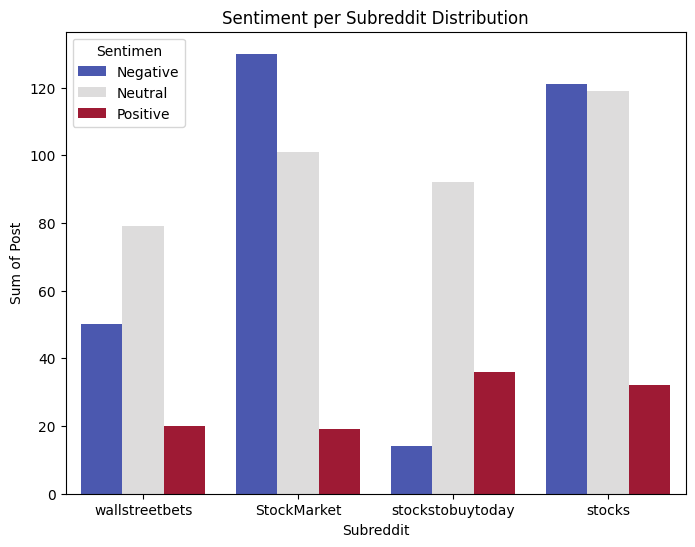

In [19]:
# Sentiment per Subreddit Distribution
plt.figure(figsize=(8,6))
sns.countplot(data=data, x="subreddit", hue="label", palette="coolwarm")
plt.title("Sentiment per Subreddit Distribution")
plt.xlabel("Subreddit")
plt.ylabel("Sum of Post")
plt.legend(title="Sentimen", labels=["Negative", "Neutral", "Positive"])
plt.show()

C:\Users\WILLIAM\AppData\Local\Temp\ipykernel_56900\1150481422.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


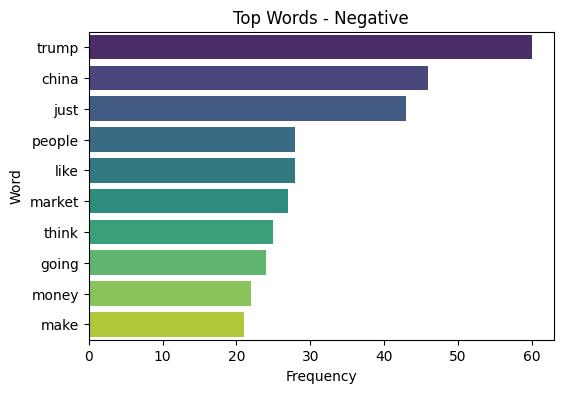

C:\Users\WILLIAM\AppData\Local\Temp\ipykernel_56900\1150481422.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


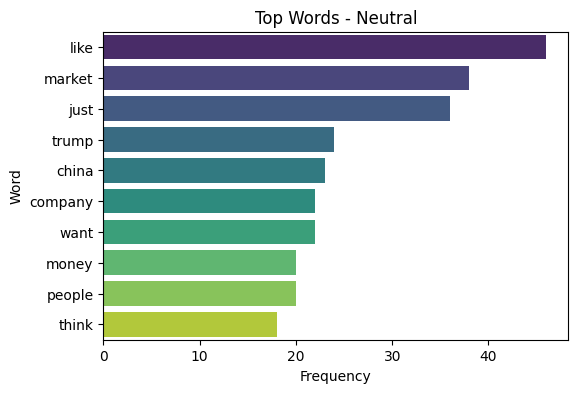

C:\Users\WILLIAM\AppData\Local\Temp\ipykernel_56900\1150481422.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


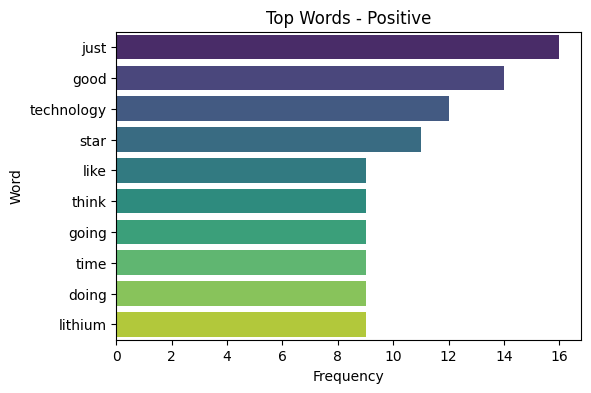

In [20]:
# Top word per label
def get_top_words(corpus, top_k=10):
    vec = CountVectorizer(stop_words="english").fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_k]

for label, group in data.groupby("label"):
    top_words = get_top_words(group["text"].astype(str), top_k=10)
    words, counts = zip(*top_words) if top_words else ([], [])
    
    plt.figure(figsize=(6,4))
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    if label == -1:
        plt.title("Top Words - Negative")
    elif label == 0:
        plt.title("Top Words - Neutral")
    else:
        plt.title("Top Words - Positive")
    plt.xlabel("Frequency")
    plt.ylabel("Word")
    plt.show()

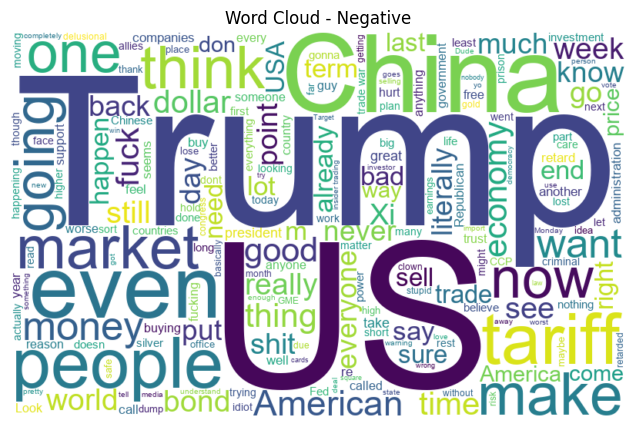

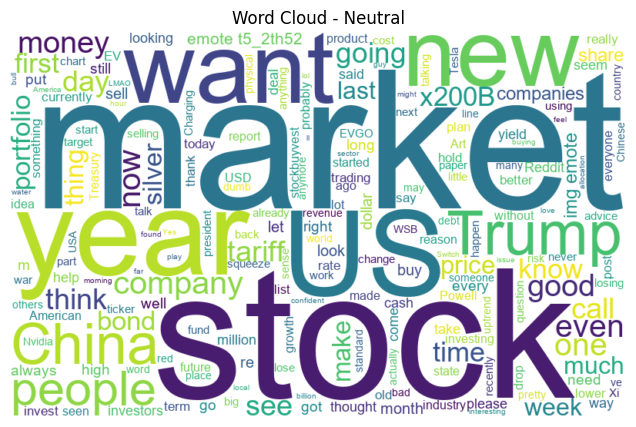

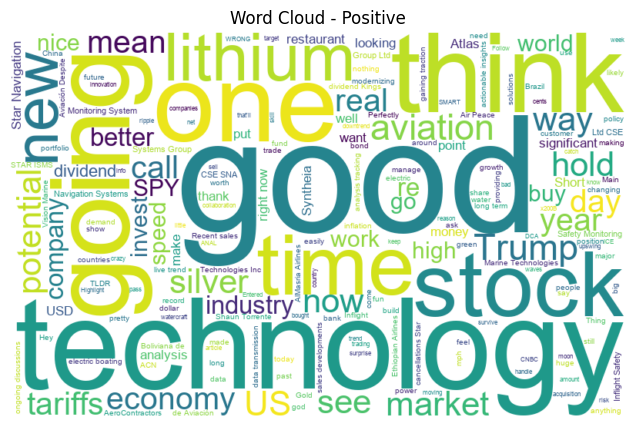

In [21]:
# Word Cloud
from wordcloud import WordCloud, STOPWORDS

font_path = "C:/Windows/Fonts/arial.ttf"

stopwords = set(STOPWORDS)
stopwords.update(["https", "http", "www", "u", "s", "t", "will"])

for label, group in data.groupby("label"):
    text_combined = " ".join(group["text"].astype(str))
    wc = WordCloud(
        width=800, height=500, 
        background_color="white",
        font_path=font_path,
        stopwords=stopwords
    ).generate(text_combined)
    
    plt.figure(figsize=(8,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    if label == -1:
        plt.title("Word Cloud - Negative")
    elif label == 0:
        plt.title("Word Cloud - Neutral")
    else:
        plt.title("Word Cloud - Positive")
    plt.show()


C:\Users\WILLIAM\AppData\Local\Temp\ipykernel_56900\2695631619.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(ngrams), palette="viridis")


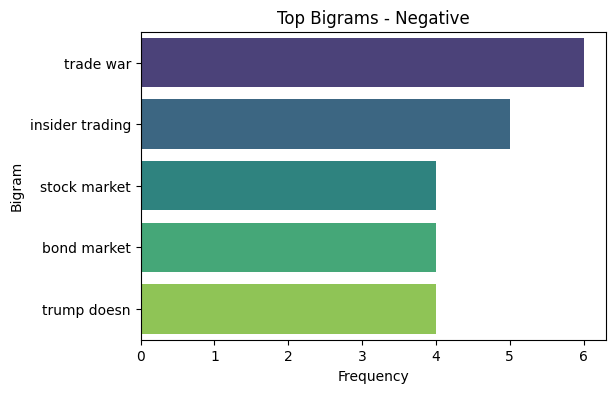

C:\Users\WILLIAM\AppData\Local\Temp\ipykernel_56900\2695631619.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(ngrams), palette="viridis")


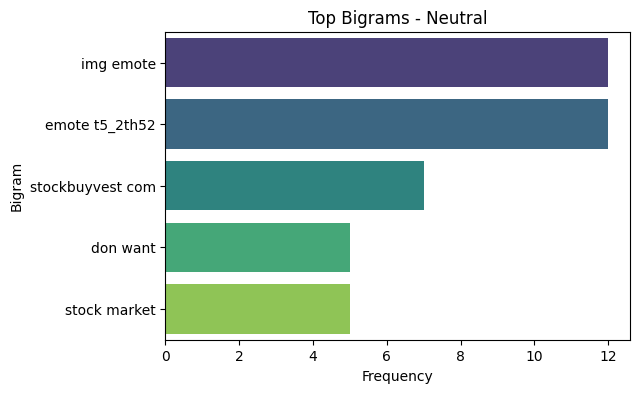

C:\Users\WILLIAM\AppData\Local\Temp\ipykernel_56900\2695631619.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(ngrams), palette="viridis")


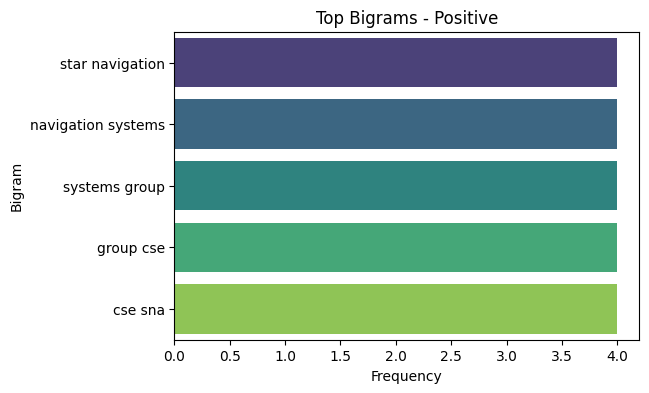

In [22]:
# Top N-Grams per label
def get_top_ngrams(corpus, n=2, top_k=10):
    vec = CountVectorizer(ngram_range=(n, n), stop_words="english").fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_k]

for label, group in data.groupby("label"):
    top_ngrams = get_top_ngrams(group["text"].astype(str), n=2, top_k=5)
    ngrams, counts = zip(*top_ngrams) if top_ngrams else ([], [])
    
    plt.figure(figsize=(6,4))
    sns.barplot(x=list(counts), y=list(ngrams), palette="viridis")
    if label == -1:
        plt.title("Top Bigrams - Negative")
    elif label == 0:
        plt.title("Top Bigrams - Neutral")
    else:
        plt.title("Top Bigrams - Positive")
    plt.xlabel("Frequency")
    plt.ylabel("Bigram")
    plt.show()

# Phase 2

根據Master的要求--->

*根據我自己的做法在下面

In [58]:
### Begin Assignment Here
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = data['label_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = data[data['label_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [59]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=2 #You can change it from 0 to 2
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category Positive:


,06,10,100,116,12,153,1728,18,1981,1992,...,year,years,yelling,yes,yesterday,yields,yikes,you,your,zero
0,0,0,0,3,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


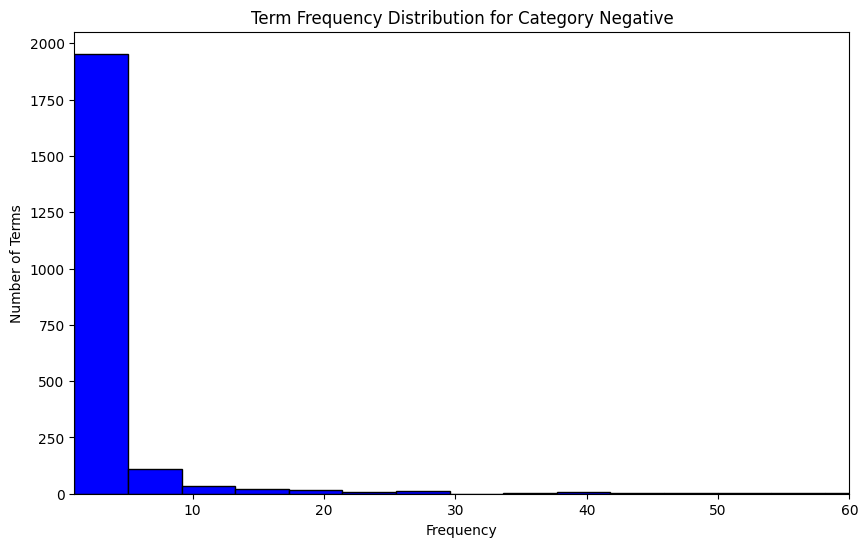

In [60]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 2
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=100, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 60)
plt.show()

In [61]:
category_number=2 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: Positive
Number of terms in top 5%: 58
Filtered terms: ['the', 'and', 'to', 'is', 'in', 'it', 'for', 'on', 'this', 'with', 'of', 'you', 'that', 'but', 'just', 'they', 'more', 'if', 'be', 'can', 'good', 'have', 'are', 'my', 'their', 'some', 'so', 'at', 'technology', 'now', 'from', 'star', 'up', 'by', 'about', 're', 'all', 'he', 'lithium', 'was', 'think', 'one', 'going', 'like', 'doing', 'time', 'will', 'not', 'as', 'aviation', 'only', 'trump', 'we', 'or', 'silver', 'has', 'analysis', 'market']


In [62]:
category_number=2 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: Positive
Number of terms in bottom 1%: 11
Filtered terms: ['24', '25', '28', '300', 'rest', '42', '4271', '4900', '4d', '4x', 'restaurant']


In [63]:
category_number=2 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category Negative we filter the following words:
Bottom 1.0% words: 
youtube       1
500           1
program       1
60            1
65            1
6k            1
6th           1
77            1
7s            1
programs      1
projection    1
98            1
9k            1
_are          1
aapl          1
50            1
yourselves    1
2k            1
2s            1
30            1
3000          1
dtype: int64
Top 5.0% words: 
these         11
dollar        11
everyone      12
could         12
literally     12
            ... 
it           147
is           178
and          193
to           231
the          409
Length: 109, dtype: int64

For category Neutral we filter the following words:
Bottom 1.0% words: 
zone          1
rapidly       1
rather        1
rational      1
rationally    1
razor         1
rbdx          1
rddt          1
reach         1
react         1
reacts        1
realizes      1
yoyo          1
reasoning     1
zgld          1
reasons       1
1242          1
re

,06,10,100,116,12,153,1728,18,1981,1992,...,yeah,year,years,yelling,yes,yesterday,yields,yikes,your,zero
0,0,0,0,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


In [65]:
import builtins

_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'latin-1'   # Force Latin-1
        kwargs['errors'] = 'ignore'      # Ignore bad characters
    return _orig_open(*args, **kwargs)
builtins.open = safe_open

Database size (total no of transactions) : 315
Number of items : 2062
Minimum Transaction Size : 1
Average Transaction Size : 11.82857142857143
Maximum Transaction Size : 139
Standard Deviation Transaction Size : 13.325085884608757
Variance in Transaction Sizes : 178.1233848953594
Sparsity : 0.9942635444090342


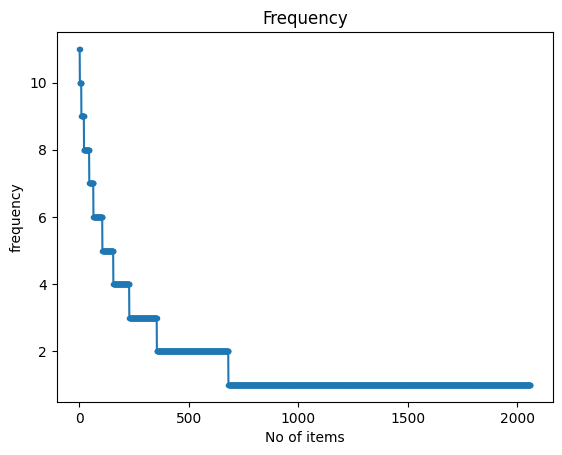

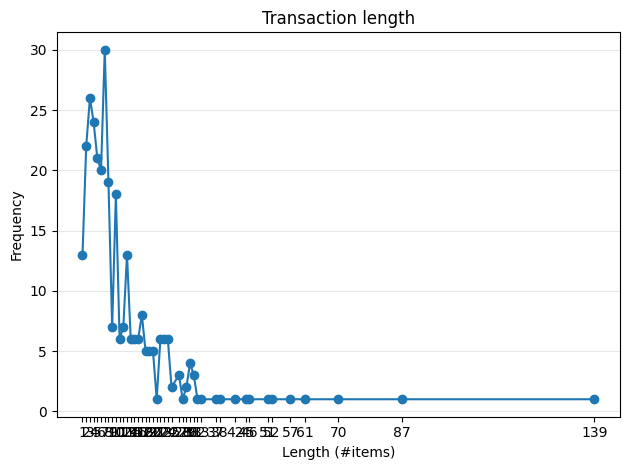

In [66]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_negative.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 383
Number of items : 2543
Minimum Transaction Size : 1
Average Transaction Size : 10.911227154046998
Maximum Transaction Size : 201
Standard Deviation Transaction Size : 18.642506087432064
Variance in Transaction Sizes : 348.4528317362241
Sparsity : 0.9957093090231824


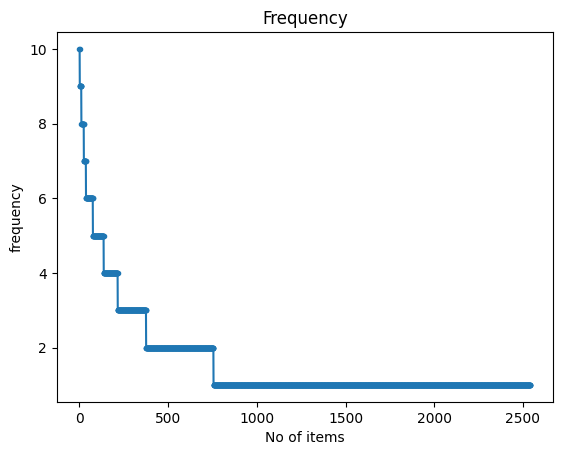

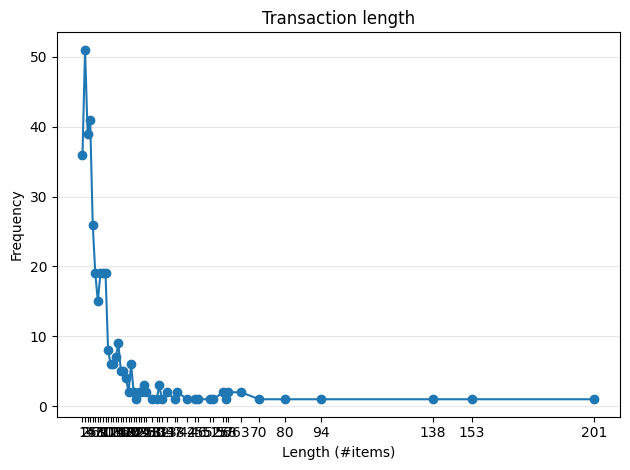

In [67]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_neutral.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 106
Number of items : 1099
Minimum Transaction Size : 1
Average Transaction Size : 14.481132075471699
Maximum Transaction Size : 92
Standard Deviation Transaction Size : 16.947327463419338
Variance in Transaction Sizes : 289.94725965858044
Sparsity : 0.9868233557093069


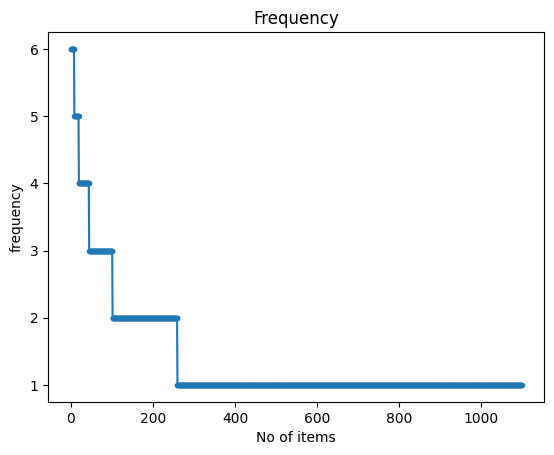

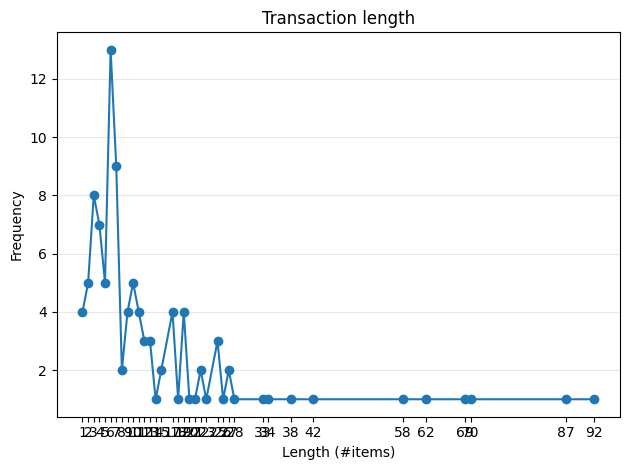

In [68]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_positive.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [72]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_negative.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_negative= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_negative))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

obj1.save('freq_patterns_negative_minSup9.txt') #save the patterns
frequentPatternsDF_negative

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 21
Runtime: 0.016106128692626953


,Patterns,Support
0,end,9
1,right,9
2,off,9
3,seems,9
4,want,9
5,same,9
6,last,9
7,america,9
8,well,9
9,week,9


In [73]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_neutral.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_neutral= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_neutral))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

obj1.save('freq_patterns_neutral_minSup9.txt') #save the patterns
frequentPatternsDF_neutral

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 11
Runtime: 0.09060359001159668


,Patterns,Support
0,looking,9
1,cash,9
2,said,9
3,way,9
4,own,9
5,reddit,9
6,ll,9
7,am,9
8,few,9
9,let,10


In [74]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_positive.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_positive= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_positive))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

obj1.save('freq_patterns_positive_minSup9.txt') #save the patterns
frequentPatternsDF_positive

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 0
Runtime: 0.12296485900878906


,Patterns,Support


In [75]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_negative, frequentPatternsDF_neutral, frequentPatternsDF_positive]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

   Patterns Support
20    after      11
19  already      11
16   should      10
12   things      10
30      let      10
18    again      10
17      bad      10
15     sure      10
14      day      10
13     here      10
31   always      10
11    great       9
22     cash       9
2       off       9
29      few       9
28       am       9
27       ll       9
26   reddit       9
25      own       9
24      way       9
23     said       9
21  looking       9
10     into       9
3     seems       9
4      want       9
5      same       9
6      last       9
1     right       9
7   america       9
8      well       9
9      week       9
0       end       9
Number of patterns discarded: 0


In [76]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(data['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
data['tokenized_text'] = data['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=data.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = data['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=data.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,into,seems,want,same,last,right,america,well,week,end
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

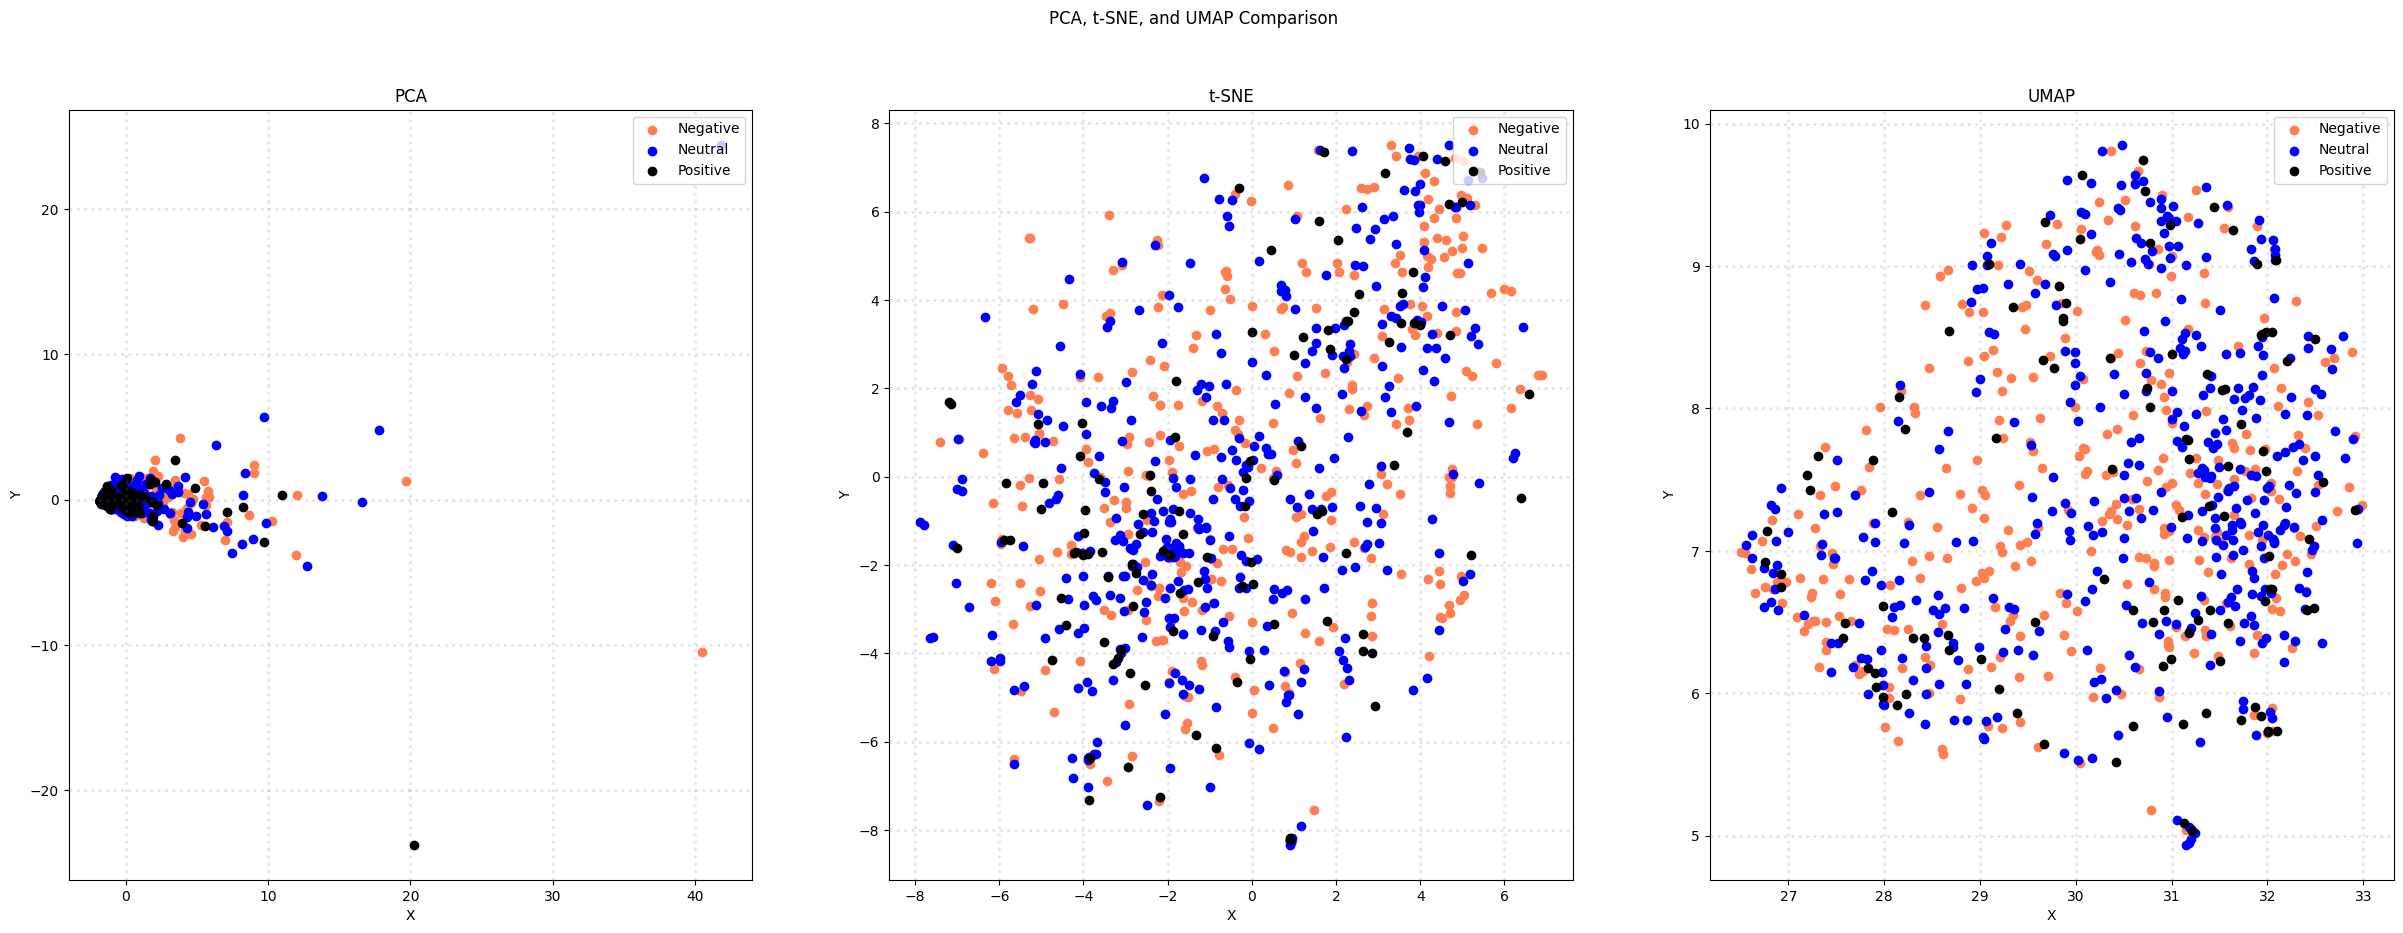

In [78]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = data['label_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[data['label_name'] == category].T[0]
        ys = X_reduced[data['label_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [79]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

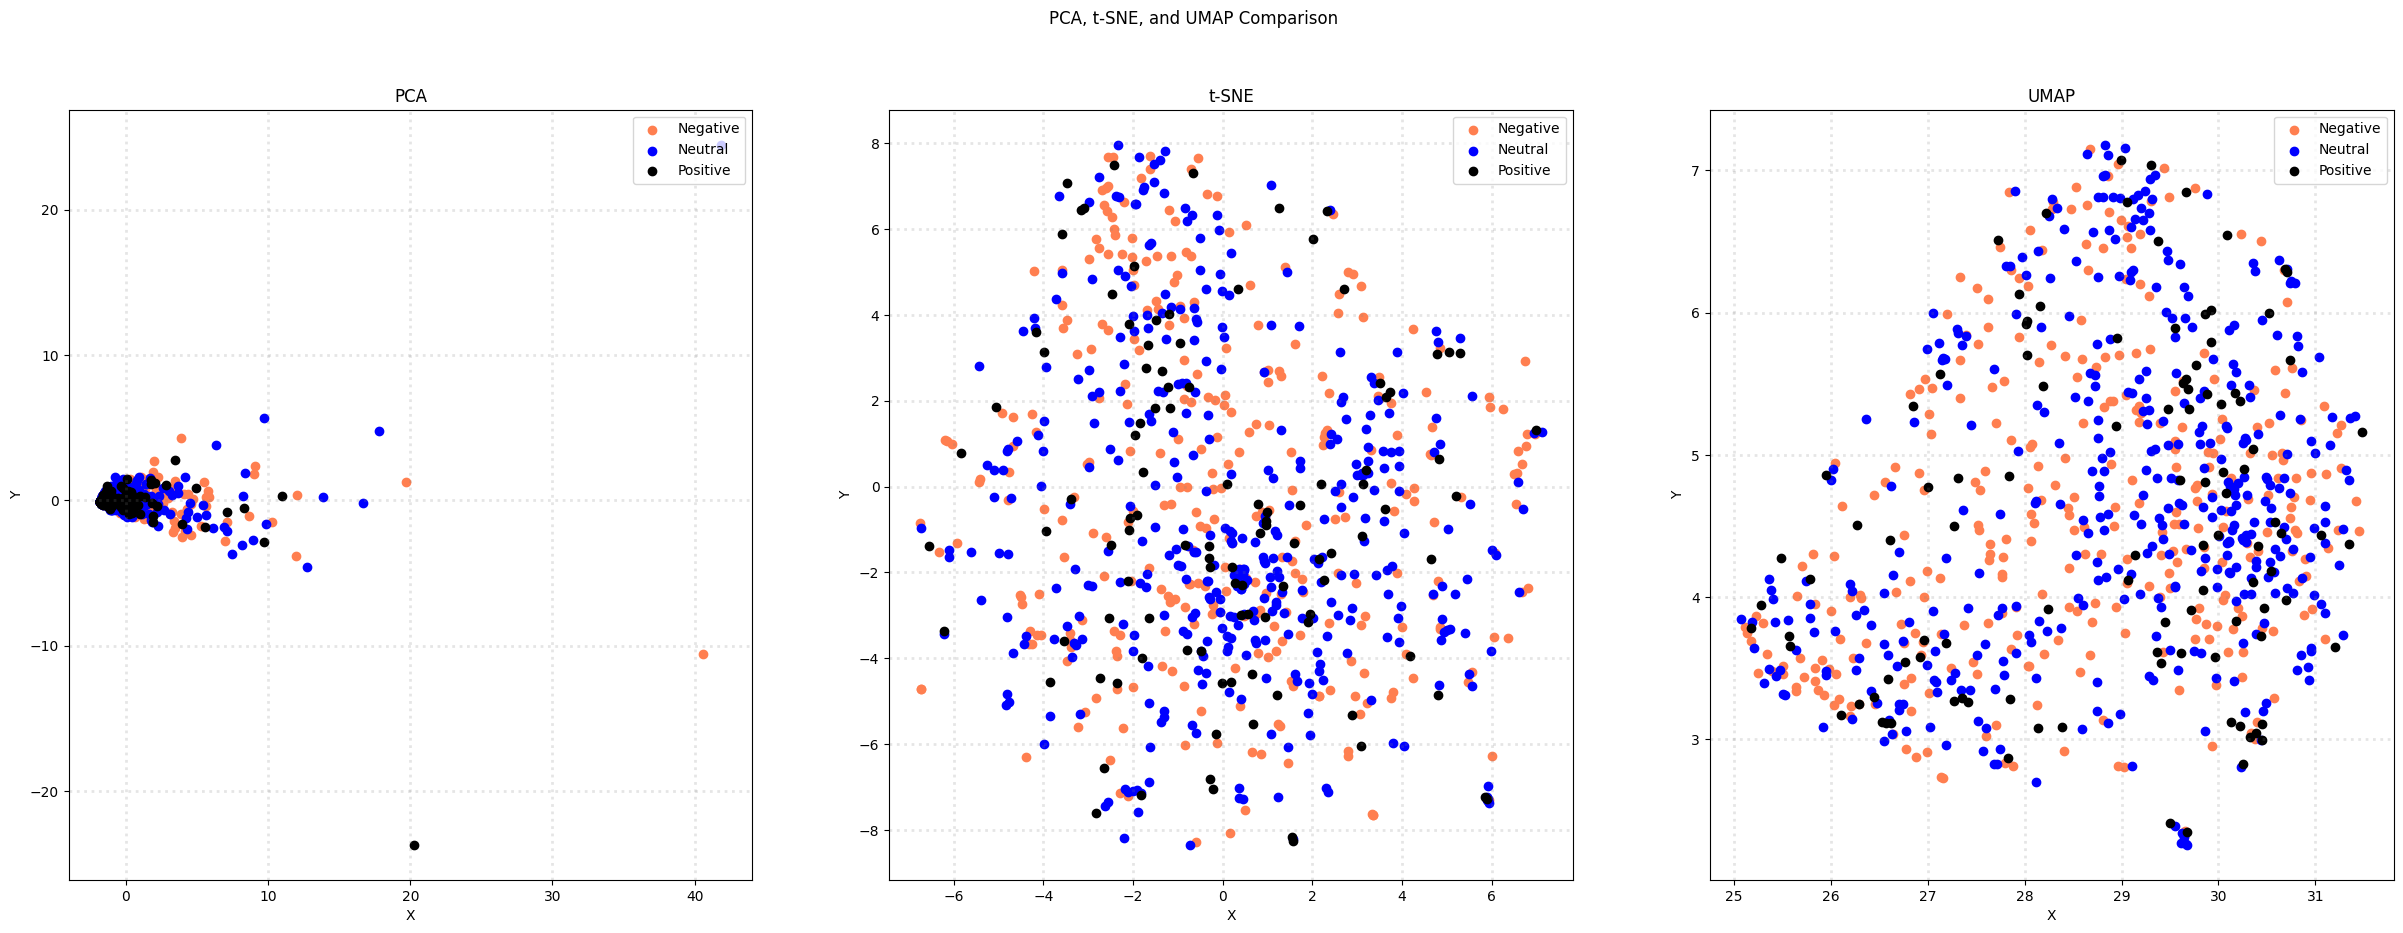

In [80]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = data['label_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[data['label_name'] == category].T[0]
        ys = X_reduced[data['label_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

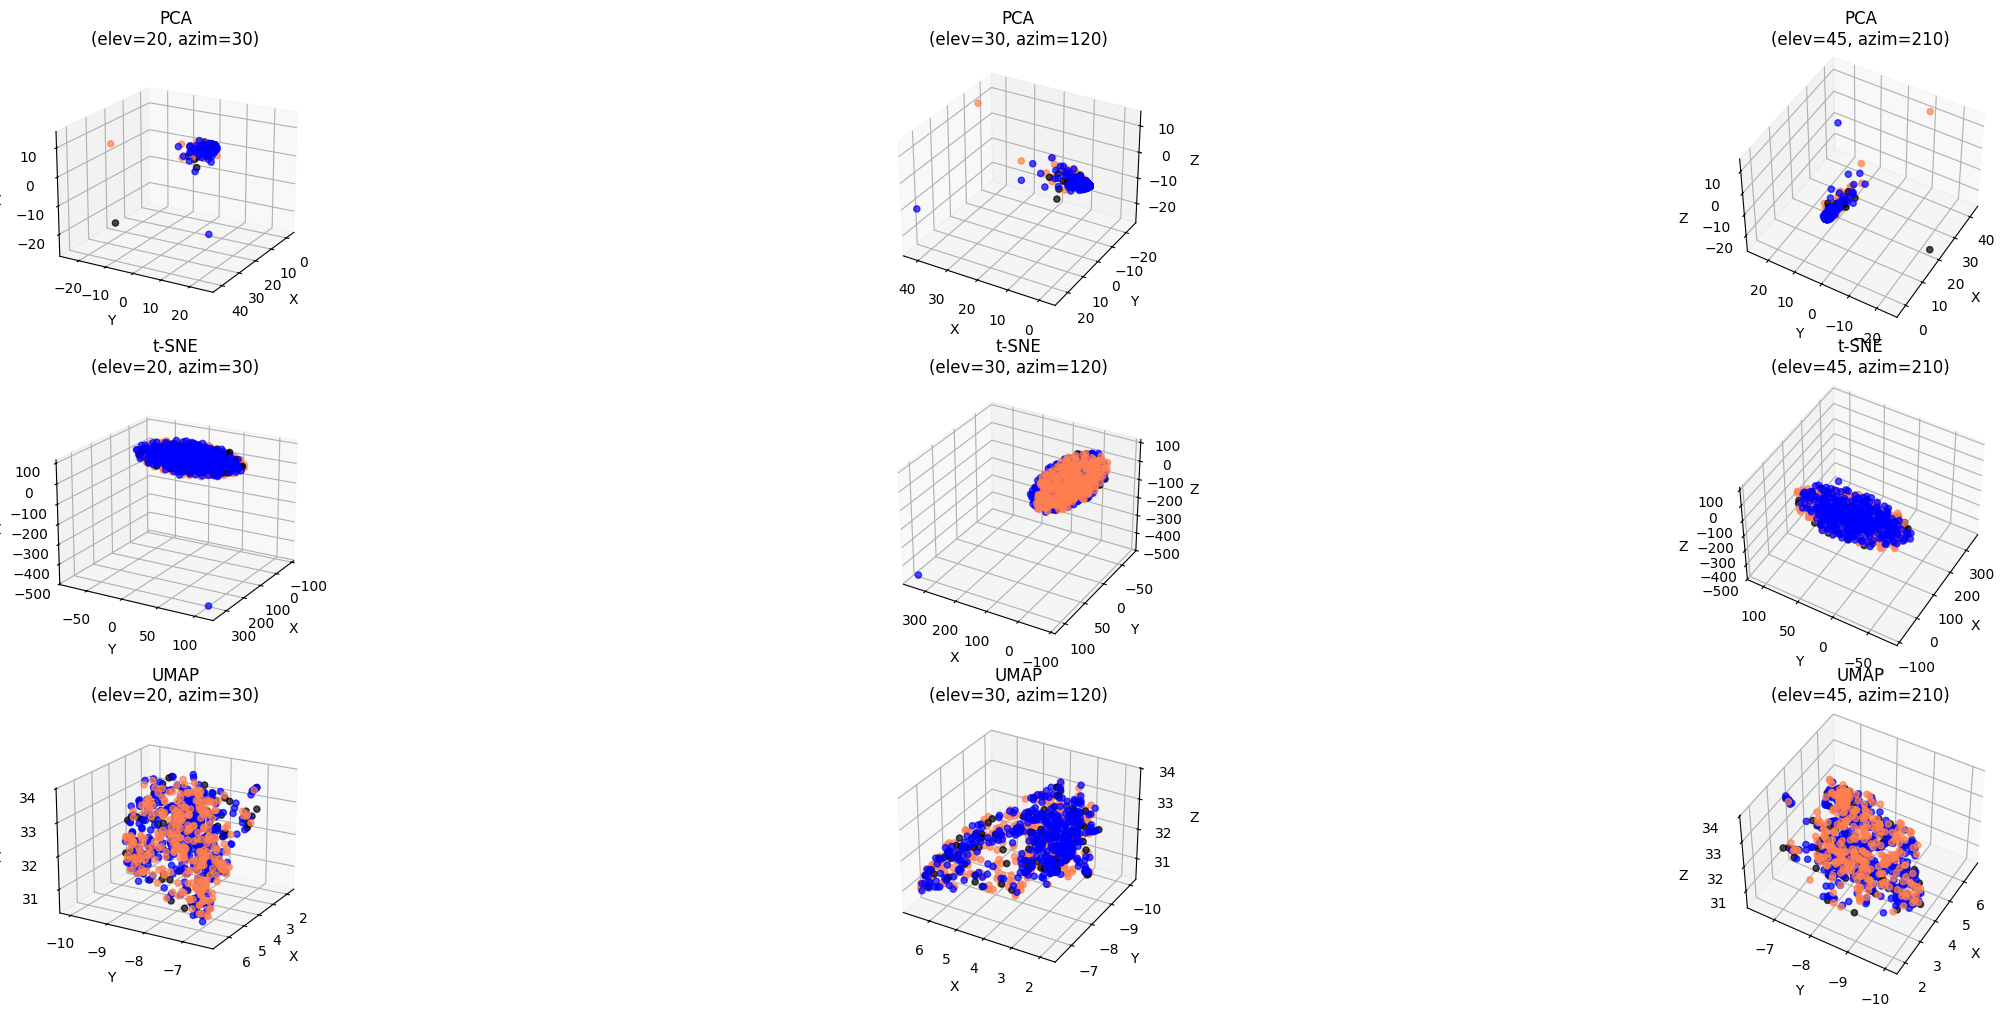

In [83]:
#Answer Here
# Apply PCA, t-SNE, and UMAP in 3D
X_pca_aug_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

# Function to create a 3D scatter plot
def plot_scatter_3d(ax, X_reduced, title, elev, azim):
    for c, category in zip(col, categories):
        xs = X_reduced[data['label_name'] == category][:, 0]
        ys = X_reduced[data['label_name'] == category][:, 1]
        zs = X_reduced[data['label_name'] == category][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category, alpha=0.7)
    
    ax.view_init(elev=elev, azim=azim)  # set camera position
    ax.set_title(title + f"\n(elev={elev}, azim={azim})")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

# Define different camera angles to explore
camera_angles = [(20, 30), (30, 120), (45, 210)]

# Plotting
fig = plt.figure(figsize=(30, 10))

# PCA
for i, (elev, azim) in enumerate(camera_angles):
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    plot_scatter_3d(ax, X_pca_aug_3d, 'PCA', elev, azim)

# t-SNE
for i, (elev, azim) in enumerate(camera_angles):
    ax = fig.add_subplot(3, 3, i+4, projection='3d')
    plot_scatter_3d(ax, X_tsne_aug_3d, 't-SNE', elev, azim)

# UMAP
for i, (elev, azim) in enumerate(camera_angles):
    ax = fig.add_subplot(3, 3, i+7, projection='3d')
    plot_scatter_3d(ax, X_umap_aug_3d, 'UMAP', elev, azim)

plt.tight_layout()
plt.show()

In [84]:
from sklearn import preprocessing
mlb = preprocessing.LabelBinarizer()
mlb.fit(data.label)
data['bin_label'] = mlb.transform(data['label']).tolist()
data[0:9]

,text,subreddit,label,label_name,unigrams,tokenized_text,bin_label
0,Calls on retards,wallstreetbets,-1,Negative,"[Calls, on, retards]","{retards, on, Calls}","[1, 0, 0]"
1,Stunt as in like why did they even make a big ...,wallstreetbets,0,Neutral,"[Stunt, as, in, like, why, did, they, even, ma...","{ever, did, first, in, talk, even, starting, s...","[0, 1, 0]"
2,Seeing lots of red in the ticker.,StockMarket,0,Neutral,"[Seeing, lots, of, red, in, the, ticker, .]","{Seeing, red, lots, the, ticker., in, of}","[0, 1, 0]"
3,Vision Marine Technologies Inc. is rewriting t...,stockstobuytoday,1,Positive,"[Vision, Marine, Technologies, Inc., is, rewri...","{be, boating, Torrente's, rulebook., Danfoss, ...","[0, 0, 1]"
4,He didn’t say thank you.,StockMarket,-1,Negative,"[He, didn, ’, t, say, thank, you, .]","{He, say, didn’t, you., thank}","[1, 0, 0]"
5,"Hoping to ejaculate in wet warm puss tonight, ...",wallstreetbets,0,Neutral,"[Hoping, to, ejaculate, in, wet, warm, puss, t...","{wish, puss, tonight,, warm, Hoping, to, wet, ...","[0, 1, 0]"
6,Trump will respond to china increasing their t...,stocks,-1,Negative,"[Trump, will, respond, to, china, increasing, ...","{be, downwards, tariffs., reporting, adjust, a...","[1, 0, 0]"
7,Confirmed not a trap. Its been like this for p...,wallstreetbets,0,Neutral,"[Confirmed, not, a, trap, ., Its, been, like, ...","{just, Its, let, this, have, 2, not, trap., be...","[0, 1, 0]"
8,Am I the only one seeing the cup & handle brea...,stocks,1,Positive,"[Am, I, the, only, one, seeing, the, cup, &, h...","{here?, seeing, Day?, was, pivot, high., break...","[0, 0, 1]"


In [92]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = data.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[500]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [93]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

In [94]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.144338
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\WILLIAM\AppData\Local\Temp\ipykernel_56900\452772485.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
C:\Users\WILLIAM\AppData\Local\Temp\ipykernel_56900\452772485.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
C:\Users\WILLIAM\AppData\Local\Temp\ipykernel_56900\452772485.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing thi

In [98]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(data[['label', 'label_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, data['label'], test_size=0.3, random_state=42)

In [99]:
# Train the Naive Bayes classifier
nb_classifier = DecisionTreeClassifier(random_state=42)
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.48360655737704916

Classification Report:
               precision    recall  f1-score   support

    Negative     0.4713    0.4227    0.4457        97
     Neutral     0.5489    0.6033    0.5748       121
    Positive     0.1667    0.1538    0.1600        26

    accuracy                         0.4836       244
   macro avg     0.3956    0.3933    0.3935       244
weighted avg     0.4773    0.4836    0.4793       244



In [100]:
#Answer
X_train, X_test, y_train, y_test = train_test_split(augmented_df, data['label'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))


Accuracy: 0.5532786885245902

Classification Report:
               precision    recall  f1-score   support

    Negative     0.5197    0.8144    0.6345        97
     Neutral     0.6588    0.4628    0.5437       121
    Positive     0.0000    0.0000    0.0000        26

    accuracy                         0.5533       244
   macro avg     0.3929    0.4257    0.3927       244
weighted avg     0.5333    0.5533    0.5219       244



根據我自己的做法

In [443]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# === 1. Load Dataset ===
df = pd.read_csv("newdataset\Reddit-stock-sentiment.csv")
df = df[['text', 'label']].dropna().drop_duplicates(keep=False)


In [444]:
# === 2. Preprocessing Function ===
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)   # Delete URL
    text = re.sub(r"[^a-z\s]", "", text)                  # Delete number & punctuation
    return text

df['clean_text'] = df['text'].astype(str).apply(clean_text) # Clean the text

In [445]:
from sklearn.utils import resample
import random

# Calculate first distribution
print("First distribution:")
print(df['label'].value_counts())

# Determine the majority and minority classes
max_count = df['label'].value_counts().max()

# Simple augmentation functions (shuffle words, delete random words)
def augment_text(text):
    words = text.split()
    if len(words) > 3:
        # swap two random words
        i, j = random.sample(range(len(words)), 2)
        words[i], words[j] = words[j], words[i]
    return " ".join(words)

# Oversampling + augmentation
balanced_data = []
for label, group in df.groupby('label'):
    if len(group) < max_count:
        # oversample with replacement
        oversampled = resample(group, 
                               replace=True, 
                               n_samples=max_count, 
                               random_state=42)
        # partial augment
        oversampled['clean_text'] = oversampled['clean_text'].apply(
            lambda x: augment_text(x) if random.random() < 0.3 else x
        )
        balanced_data.append(oversampled)
    else:
        balanced_data.append(group)

# Recombine
balanced_df = pd.concat(balanced_data)
df=balanced_df

print("\nDistribution after balancing + augmentation:")
print(df['label'].value_counts())

First distribution:
label
 0.0    391
-1.0    315
 1.0    107
Name: count, dtype: int64

Distribution after balancing + augmentation:
label
-1.0    391
 0.0    391
 1.0    391
Name: count, dtype: int64


In [446]:
# === 3. Train/Test Split for MultinomialNB===
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

In [447]:
# === 4. Word Frequency (CountVectorizer) + MultinomialNB ===
count_vect = CountVectorizer(stop_words='english', ngram_range=(1,2), max_features=6000)
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

nb_count = MultinomialNB()
nb_count.fit(X_train_counts, y_train)
y_pred_count = nb_count.predict(X_test_counts)

print("=== Naive Bayes with CountVectorizer ===")
print("Accuracy:", accuracy_score(y_test, y_pred_count))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_count))
print(classification_report(y_test, y_pred_count))

=== Naive Bayes with CountVectorizer ===
Accuracy: 0.7574468085106383
Confusion Matrix:
 [[71  3  4]
 [30 37 11]
 [ 3  6 70]]
              precision    recall  f1-score   support

        -1.0       0.68      0.91      0.78        78
         0.0       0.80      0.47      0.60        78
         1.0       0.82      0.89      0.85        79

    accuracy                           0.76       235
   macro avg       0.77      0.76      0.74       235
weighted avg       0.77      0.76      0.74       235



In [448]:
# === 5. TF-IDF (TfidfVectorizer) + MultinomialNB ===
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_features=6000)
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

print("\n=== Naive Bayes with TF-IDF ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))


=== Naive Bayes with TF-IDF ===
Accuracy: 0.7574468085106383
Confusion Matrix:
 [[71  2  5]
 [33 31 14]
 [ 2  1 76]]
              precision    recall  f1-score   support

        -1.0       0.67      0.91      0.77        78
         0.0       0.91      0.40      0.55        78
         1.0       0.80      0.96      0.87        79

    accuracy                           0.76       235
   macro avg       0.79      0.76      0.73       235
weighted avg       0.79      0.76      0.73       235



In [449]:
# === 5. TF-IDF (TfidfVectorizer) + XGBoost ===
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_features=6000)
X = vectorizer.fit_transform(df['clean_text'])

y_raw = df['label'].values.reshape(-1, 1)

# Initialitation encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Transformation
y_encoded = encoder.fit_transform(y_raw)

# Split data for XGBoost and Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_raw)

# Initialitation model
model = XGBClassifier(
    n_estimators=300, #300
    max_depth=15, #15
    learning_rate=0.1, #0.1
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Convert one-hot back to class index
y_test_int = np.argmax(y_test, axis=1)
y_pred_int = np.argmax(y_pred, axis=1)

# Evaluation
print("Accuracy:", accuracy_score(y_test_int, y_pred_int))
print("Confusion Matrix:\n", confusion_matrix(y_test_int, y_pred_int))
print("Classification Report:\n", classification_report(y_test_int, y_pred_int))


d:\Code\DataMining\DM2025-Lab1-Exercise\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:06:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.7617021276595745
Confusion Matrix:
 [[62 15  1]
 [21 55  2]
 [12  5 62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.79      0.72        78
           1       0.73      0.71      0.72        78
           2       0.95      0.78      0.86        79

    accuracy                           0.76       235
   macro avg       0.78      0.76      0.77       235
weighted avg       0.78      0.76      0.77       235



In [450]:
# === 5. TF-IDF (TfidfVectorizer) + Random Forest ===
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialitation model
rf_clf = RandomForestClassifier(
    n_estimators=300,      
    max_depth=None,        
    random_state=42,
    n_jobs=-1               
)

# Train
rf_clf.fit(X_train, y_train)

# Predict
y_pred_rf = rf_clf.predict(X_test)

y_test_int = np.argmax(y_test, axis=1)
y_pred_int = np.argmax(y_pred_rf, axis=1)

# Evaluation
print("\n=== Random Forest with TF-IDF ===")
print("Accuracy:", accuracy_score(y_test_int, y_pred_int))
print("Confusion Matrix:\n", confusion_matrix(y_test_int, y_pred_int))
print(classification_report(y_test_int, y_pred_int))



=== Random Forest with TF-IDF ===
Accuracy: 0.902127659574468
Confusion Matrix:
 [[65 13  0]
 [ 6 71  1]
 [ 1  2 76]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.87        78
           1       0.83      0.91      0.87        78
           2       0.99      0.96      0.97        79

    accuracy                           0.90       235
   macro avg       0.91      0.90      0.90       235
weighted avg       0.91      0.90      0.90       235



In [ ]:
'''
How I improve the data process

1. Imbalanced Label Distribution
The original dataset has uneven label distribution, which can bias the model toward the majority class.
I was handled by oversampling minority classes with replacement and simple augmentation.

2. Text Preprocessing
Text cleaning removes URLs, numbers, and punctuation, and converts to lowercase.
Stop words are removed during vectorization rather than before, which may limit preprocessing flexibility.

3. Vectorization Strategy
Both CountVectorizer and TF-IDF are used to find the “best” features.

4. One-Hot Encoding for Labels
Required for XGBoost and Random Forest in the multi-class setting.

5. Use XGBoost and Random Forest
Tuning their parameter until get the highest accuracy
'''